<a href="https://colab.research.google.com/github/Saidul-1/CSE4132-Artificial-Intelligence-Lab/blob/main/Assignment6_FCFNN_Digit_Classifier_Custom%2BMNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a report in pdf format using any Latex system after:
* Prepare an English handwritten digit dataset by collecting hand written data and
splitting into the training set and test.

* Retrain FCFNN using your training set with the training set of the MNIST English
digit dataset.
* Evaluate your FCFNN using your test set along with the test set of the MNIST
English dataset.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist, mnist, cifar10
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def combine_dataset(trainX1, trainY1, testX1, testY1, trainX2, trainY2, testX2, testY2):
  trainX = np.concat((trainX1, trainX2), axis=0)
  trainY = np.concat((trainY1, trainY2), axis=0)
  testX = np.concat((testX1, testX2), axis=0)
  testY = np.concat((testY1, testY2), axis=0)

  (trainX, trainY) = shuffle(trainX, trainY)
  (testX, testY) = shuffle(testX, testY)
  return (trainX, trainY), (testX, testY)

In [ ]:
def preprocess_data(trainX, trainY, testX, testY):

  print(f"trainX shape: {trainX.shape}, trainY shape: {trainY.shape}")
  print(f"testX shape: {testX.shape}, testY shape: {testY.shape}")

  # Normalize inputs to [0,1] and ensure float32
  trainX = trainX.astype('float32')/255.0
  testX = testX.astype('float32')/255.0

  # Convert output labels to one-hot encoding (for 10 classes: digits 0-9)
  trainY = to_categorical(trainY, 10)
  testY = to_categorical(testY, 10)

  print("After normalization and labeling:\n")
  print(f"trainX shape: {trainX.shape}, trainY shape: {trainY.shape}")
  print(f"testX shape: {testX.shape}, testY shape: {testY.shape}")

  return (trainX, trainY), (testX, testY)

In [ ]:
def build_model(input_shape):
  inputs = Input(input_shape)
  x = Flatten()(inputs)
  h1 = Dense(128, activation = 'relu')(x)
  h2 = Dense(64, activation = 'relu')(h1)
  h3 = Dense(128, activation = 'relu')(h2)
  outputs = Dense(10, activation = 'softmax')(h3)

  model = Model(inputs, outputs)
  model.summary(show_trainable=True)
  model.compile(optimizer='adam', loss='categorical_crossentropy')

  return model


In [ ]:
def train_model(my_model, trainX, trainY, training_epochs):
  history = my_model.fit(
      trainX, trainY,
      validation_split = 0.2,
      batch_size = 64,
      epochs = training_epochs,
  )
  return history

In [ ]:
def loss_curve(training_history):
  plt.figure(figsize=(8, 6))
  plt.plot(training_history.history['loss'], label='train_loss')
  plt.plot(training_history.history['val_loss'], label='val_loss')
  plt.title('Loss Curves')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
def sample_prediction_plot(testX, testY_labels, predY_labels):
  plt.figure(figsize=(10, 10))
  num_samples, rows, cols = 25, 5, 5
  for i in range(min(num_samples, len(testX))):
      plt.subplot(rows, cols, i+1)
      plt.axis('off')
      plt.imshow(testX[i])
      color = 'green' if(testY_labels[i] == predY_labels[i]) else 'red'
      plt.title(f'True: {testY_labels[i]},\n Pred: {predY_labels[i]}', color=color)
  plt.suptitle(f'Sample Predictions from Test Set')
  plt.tight_layout()
  plt.show()

In [ ]:
def main():
  # Mnist dataset
  (mnist_trainX, mnist_trainY), (mnist_testX, mnist_testY) = mnist.load_data()

  # Custom dataset
  custom_digit_dataset = np.load('/content/drive/MyDrive/custom_digit_dataset3.npz')
  custom_trainY = custom_digit_dataset['trainY']
  custom_trainX = custom_digit_dataset['trainX']
  custom_testX = custom_digit_dataset['testX']
  custom_testY = custom_digit_dataset['testY']

  # Combined dataset
  (trainX, trainY), (testX, testY) = combine_dataset(mnist_trainX, mnist_trainY, mnist_testX, mnist_testY, custom_trainX, custom_trainY, custom_testX, custom_testY)

  training_epochs = 15
  (trainX, trainY), (testX, testY) = preprocess_data(trainX, trainY, testX, testY)
  input_shape = trainX.shape[1:]
  model = build_model(input_shape)
  history = train_model(model, trainX, trainY, training_epochs)

  # Training loss curve plot
  loss_curve(history)

  # Custom test set Accuracy
  custom_predY = model.predict(custom_testX)
  custom_predY_labels = np.argmax(custom_predY, axis=1)
  custom_test_accuracy = accuracy_score(custom_testY, custom_predY_labels)
  print(f"Accuracy on Custom Test set: {custom_test_accuracy:.4f}")

  sample_prediction_plot(custom_testX, custom_testY, custom_predY_labels)


  # Mnist test set Accuracy
  mnist_predY = model.predict(mnist_testX)
  mnist_predY_labels = np.argmax(mnist_predY, axis=1)
  mnist_test_accuracy = accuracy_score(mnist_testY, mnist_predY_labels)
  print(f"Accuracy on mnist Test set: {mnist_test_accuracy:.4f}")

  sample_prediction_plot(mnist_testX, mnist_testY, mnist_predY_labels)


  # Combined test set Accuracy
  predY = model.predict(testX)
  predY_labels = np.argmax(predY, axis=1)
  testY_labels = np.argmax(testY, axis=1)

  test_accuracy = accuracy_score(testY_labels, predY_labels)
  print(f"Accuracy on Combined Test set: {test_accuracy:.4f}")

  sample_prediction_plot(testX, testY_labels, predY_labels)



trainX shape: (62460, 28, 28), trainY shape: (62460,)
testX shape: (10616, 28, 28), testY shape: (10616,)
After normalization and labeling:

trainX shape: (62460, 28, 28), trainY shape: (62460, 10)
testX shape: (10616, 28, 28), testY shape: (10616, 10)


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_20 (InputLayer) │ (None, 28, 28)        │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_20 (Flatten)        │ (None, 784)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_80 (Dense)            │ (None, 128)           │    100,480 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_81 (Dense)            │ (None, 64)            │      8,256 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_82 (Dense)            │ (None, 128)           │      8,320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_83 (Dense)            │ (None, 10)            │      1,290 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 118,346 (462.29 KB)

 Trainable params: 118,346 (462.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.6121 - val_loss: 0.1706
Epoch 2/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1429 - val_loss: 0.1230
Epoch 3/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0938 - val_loss: 0.1065
Epoch 4/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0679 - val_loss: 0.1138
Epoch 5/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0517 - val_loss: 0.1054
Epoch 6/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0437 - val_loss: 0.1161
Epoch 7/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0314 - val_loss: 0.1197
Epoch 8/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0302 - val_loss: 0.1143
Epoch 9/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0268 - val_loss: 0.1124
Epoch 10/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0194 - val_loss: 0.1272
Epoch 11/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0213 - val_loss: 0.1186
Epoch 12/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step

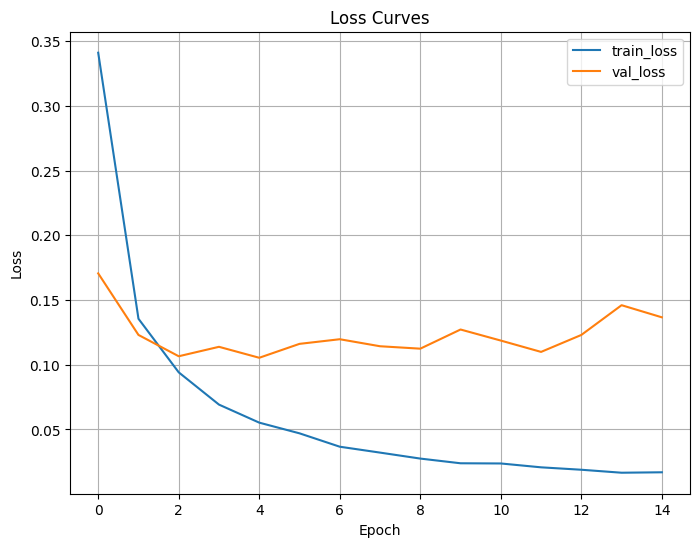

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy on Custom Test set: 0.8961


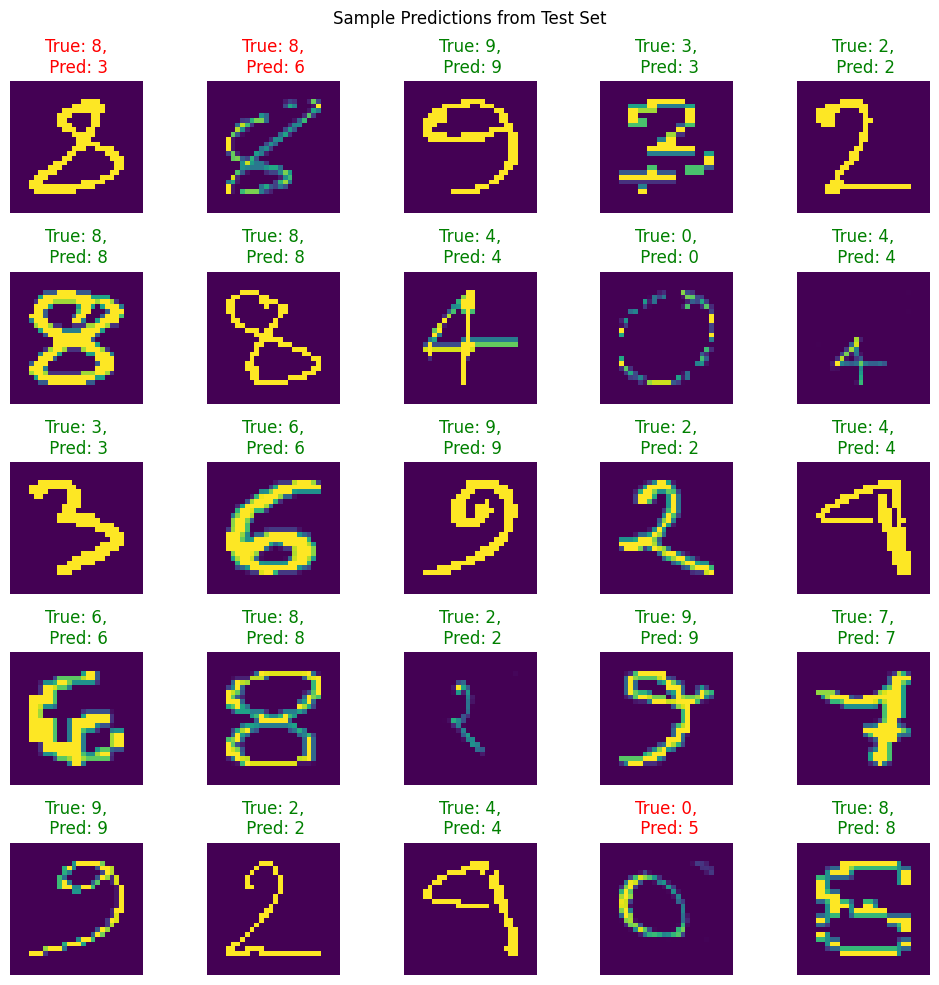

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy on mnist Test set: 0.9781


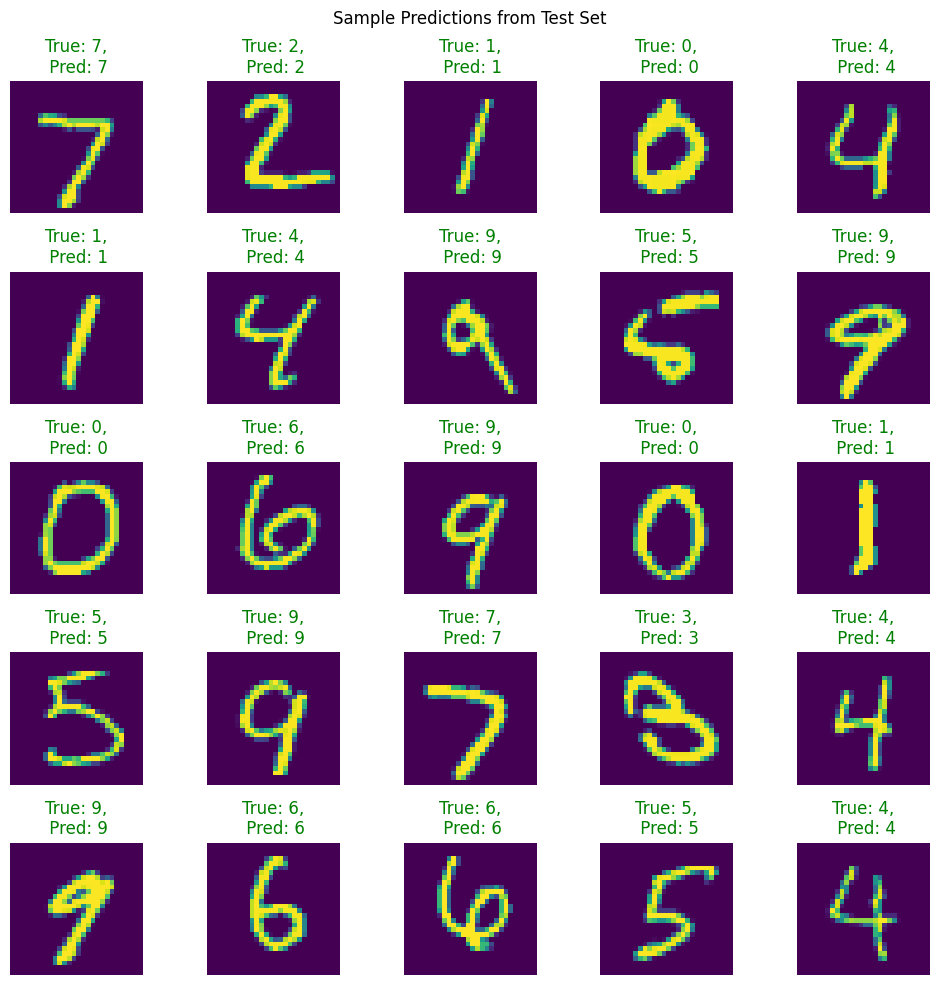

332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy on Combined Test set: 0.9737


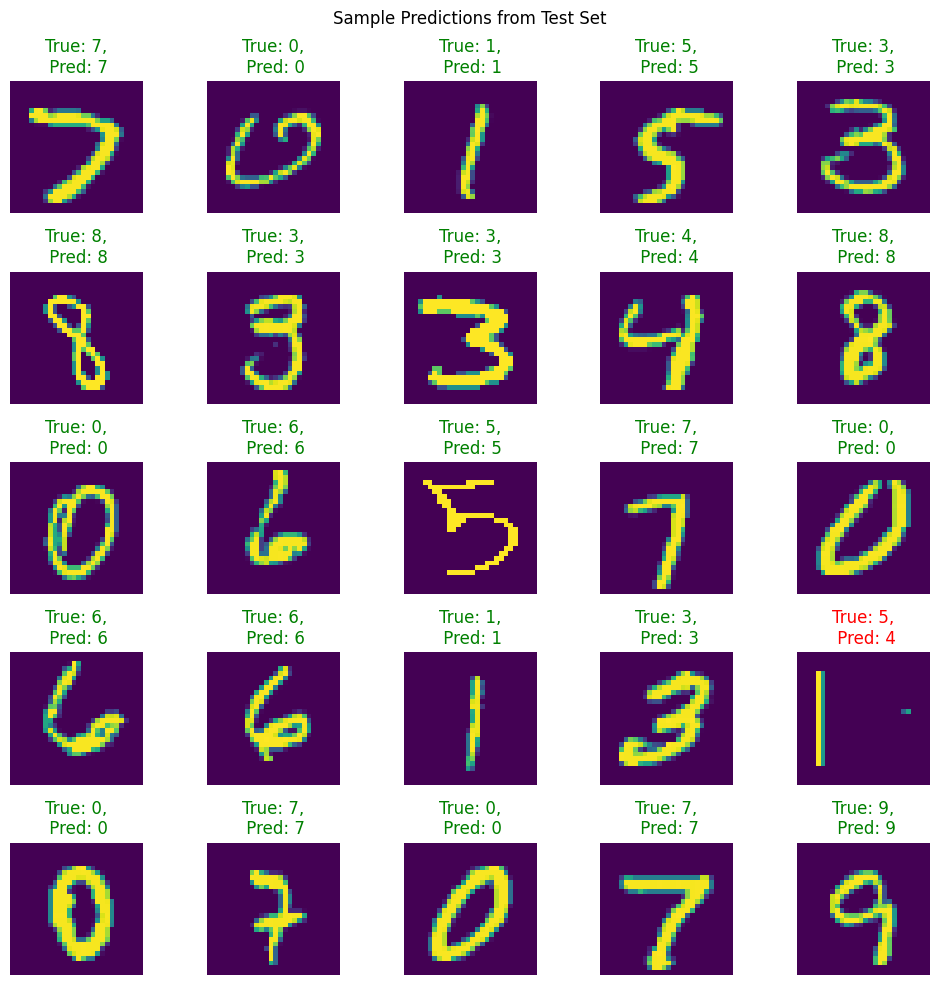

In [ ]:
if __name__ == '__main__':
    main()